In [88]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

In [89]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)

cancellations_hospital_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hospital.csv")
cancellations_hospital = pd.read_csv(cancellations_hospital_fp)

cancellations_hb_fp = os.path.join(os.getcwd(), "datasets", "cancellations_by_hb.csv")
cancellations_hb = pd.read_csv(cancellations_hb_fp)

hospital_names_fp = os.path.join(os.getcwd(), "datasets", "hospitals_scotland.csv")
hospital_names = pd.read_csv(hospital_names_fp)

hb_names_fp = os.path.join(os.getcwd(), "datasets", "hb_names.xlsx")
hb_names = pd.read_excel(hb_names_fp)

specialhb_names_fp = os.path.join(os.getcwd(), "datasets", "specialhb_name.csv")
specialhb_names = pd.read_csv(specialhb_names_fp)

In [90]:
cancellations_scotland.isna().sum()

#print("number of rows", len(cancellations_scotland))

_id                              0
Month                            0
Country                          0
TotalOperations                  0
TotalOperationsQF              105
TotalCancelled                   0
TotalCancelledQF               105
CancelledByPatientReason         0
CancelledByPatientReasonQF     105
ClinicalReason                   0
ClinicalReasonQF               105
NonClinicalCapacityReason        0
NonClinicalCapacityReasonQF    105
OtherReason                      0
OtherReasonQF                  105
dtype: int64

In [91]:
cancellations_scotland

,_id,Month,Country,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,1,201505,S92000003,28810,NaN,2695,NaN,1057,NaN,853,NaN,523,NaN,262,NaN
1,2,201506,S92000003,30941,NaN,2800,NaN,1194,NaN,870,NaN,449,NaN,287,NaN
2,3,201507,S92000003,27725,NaN,2642,NaN,1083,NaN,854,NaN,457,NaN,248,NaN
3,4,201508,S92000003,28948,NaN,2630,NaN,1080,NaN,912,NaN,491,NaN,147,NaN
4,5,201509,S92000003,30938,NaN,2829,NaN,1122,NaN,1000,NaN,535,NaN,172,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,202309,S92000003,23209,NaN,2105,NaN,739,NaN,738,NaN,541,NaN,87,NaN
101,102,202310,S92000003,24201,NaN,2286,NaN,775,NaN,797,NaN,580,NaN,134,NaN
102,103,202311,S92000003,25922,NaN,2277,NaN,737,NaN,820,NaN,582,NaN,138,NaN
103,104,202312,S92000003,20837,NaN,2014,NaN,677,NaN,725,NaN,515,NaN,97,NaN


In [121]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,HB_Name
0,1,201505,S08000015,1861,178,52,70,27,29,Ayrshire and Arran
1,16,201506,S08000015,2015,205,71,83,29,22,Ayrshire and Arran
2,31,201507,S08000015,2081,208,70,89,17,32,Ayrshire and Arran
3,46,201508,S08000015,1922,193,74,62,26,31,Ayrshire and Arran
4,61,201509,S08000015,1976,196,70,78,24,24,Ayrshire and Arran
...,...,...,...,...,...,...,...,...,...,...
1570,1515,202309,SB0801,2388,139,64,52,23,0,The Golden Jubilee National Hospital
1571,1530,202310,SB0801,2479,165,69,67,29,0,The Golden Jubilee National Hospital
1572,1545,202311,SB0801,2583,172,74,64,34,0,The Golden Jubilee National Hospital
1573,1560,202312,SB0801,2101,136,71,51,14,0,The Golden Jubilee National Hospital


In [93]:
cancellations_hb.isna().sum()

_id                               0
Month                             0
HBT                               1
TotalOperations                   0
TotalOperationsQF              1575
TotalCancelled                    0
TotalCancelledQF               1575
CancelledByPatientReason          0
CancelledByPatientReasonQF     1575
ClinicalReason                    0
ClinicalReasonQF               1575
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    1575
OtherReason                       0
OtherReasonQF                  1575
dtype: int64

In [94]:
cancellations_hospital

,_id,Month,Hospital,TotalOperations,TotalOperationsQF,TotalCancelled,TotalCancelledQF,CancelledByPatientReason,CancelledByPatientReasonQF,ClinicalReason,ClinicalReasonQF,NonClinicalCapacityReason,NonClinicalCapacityReasonQF,OtherReason,OtherReasonQF
0,1,201505,A111H,884,NaN,67,NaN,21,NaN,25,NaN,16,NaN,5,NaN
1,2,201506,A111H,945,NaN,84,NaN,39,NaN,30,NaN,12,NaN,3,NaN
2,3,201507,A111H,948,NaN,72,NaN,25,NaN,33,NaN,6,NaN,8,NaN
3,4,201508,A111H,882,NaN,74,NaN,42,NaN,18,NaN,12,NaN,2,NaN
4,5,201509,A111H,845,NaN,67,NaN,32,NaN,30,NaN,3,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4497,4498,202401,Z102H,164,NaN,27,NaN,16,NaN,3,NaN,8,NaN,0,NaN
4498,4499,202401,T101H,822,NaN,69,NaN,26,NaN,27,NaN,2,NaN,14,NaN
4499,4500,202401,T202H,336,NaN,22,NaN,4,NaN,11,NaN,1,NaN,6,NaN
4500,4501,202401,T312H,392,NaN,40,NaN,16,NaN,9,NaN,2,NaN,13,NaN


In [95]:
cancellations_hospital.isna().sum()

_id                               0
Month                             0
Hospital                          0
TotalOperations                   0
TotalOperationsQF              4502
TotalCancelled                    0
TotalCancelledQF               4502
CancelledByPatientReason          0
CancelledByPatientReasonQF     4502
ClinicalReason                    0
ClinicalReasonQF               4502
NonClinicalCapacityReason         0
NonClinicalCapacityReasonQF    4502
OtherReason                       0
OtherReasonQF                  4502
dtype: int64

In [96]:
# Dropping columns where all the rows have Nan
cancellations_hospital.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_scotland.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)
cancellations_hb.drop(columns=["TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)


In [97]:
cancellations_hb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        1575 non-null   int64 
 1   Month                      1575 non-null   int64 
 2   HBT                        1574 non-null   object
 3   TotalOperations            1575 non-null   int64 
 4   TotalCancelled             1575 non-null   int64 
 5   CancelledByPatientReason   1575 non-null   int64 
 6   ClinicalReason             1575 non-null   int64 
 7   NonClinicalCapacityReason  1575 non-null   int64 
 8   OtherReason                1575 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 110.9+ KB


In [98]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,1,201505,S08000015,1861,178,52,70,27,29
1,2,201505,S08000016,457,66,11,10,45,0
2,3,201505,S08000017,1433,113,33,56,15,9
3,4,201505,S08000019,1250,91,40,34,10,7
4,5,201505,S08000020,3310,264,110,71,76,7
...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,64,21,27,16,0
1571,1572,202401,S08000030,1550,131,46,47,5,33
1572,1573,202401,S08000031,5121,452,135,144,120,53
1573,1574,202401,S08000032,1930,167,93,43,27,4


In [99]:
cancellations_hb.groupby("HBT").sum()
#SB0801 is a special health board, Golden Jubilee University National Hospital

,_id,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
HBT,,,,,,,,
S08000015,82005,21202293,152999,15721,4809,6991,3072,849
S08000016,82110,21202293,34069,3477,888,807,1731,51
S08000017,82215,21202293,143662,12470,3952,5540,2369,606
S08000019,82320,21202293,96995,9021,3238,3143,2190,450
S08000020,82425,21202293,261396,24103,8417,7640,6848,1198
S08000022,82530,21202293,110080,13865,5039,3812,4928,86
S08000024,82635,21202293,449077,48812,21047,14042,10454,3269
S08000025,82740,21202293,24913,1976,745,364,639,228
S08000026,82845,21202293,17133,1119,507,353,244,15


In [100]:
# exactly 15 health board for each month
len(cancellations_hb[cancellations_hb["HBT"] == "SB0801"])
# SB0801 has a missing month 202308 but it seems that there is a missing 202308 hbt name so presumed it is for HBT SB0801

cancellations_hb.info() 
# confirmed that there is a missing name for the HBT which i presume will be for HBT SB0801

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        1575 non-null   int64 
 1   Month                      1575 non-null   int64 
 2   HBT                        1574 non-null   object
 3   TotalOperations            1575 non-null   int64 
 4   TotalCancelled             1575 non-null   int64 
 5   CancelledByPatientReason   1575 non-null   int64 
 6   ClinicalReason             1575 non-null   int64 
 7   NonClinicalCapacityReason  1575 non-null   int64 
 8   OtherReason                1575 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 110.9+ KB


In [101]:
# Changing the nan value for the missing month for SB0801
cancellations_hb.loc[1499,"HBT"] = "SB0801"

In [102]:
# Checking that the value of the missing hbt name has been changed
cancellations_hb[(cancellations_hb["Month"] == 202308)]

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
1485,1486,202308,S08000015,1433,116,20,54,39,3
1486,1487,202308,S08000016,347,28,8,6,14,0
1487,1488,202308,S08000017,1509,168,60,63,37,8
1488,1489,202308,S08000019,1011,90,25,33,26,6
1489,1490,202308,S08000020,2251,198,71,67,49,11
1490,1491,202308,S08000022,1149,88,27,29,32,0
1491,1492,202308,S08000024,4145,479,203,145,128,3
1492,1493,202308,S08000025,297,52,20,11,9,12
1493,1494,202308,S08000026,191,19,6,4,8,1
1494,1495,202308,S08000028,119,8,2,1,4,1


In [103]:
cancellations_hb.HBT.value_counts()
# yep now so all the HBT have 105 months 

S08000015    105
S08000016    105
S08000017    105
S08000019    105
S08000020    105
S08000022    105
S08000024    105
S08000025    105
S08000026    105
S08000028    105
S08000029    105
S08000030    105
S08000031    105
S08000032    105
SB0801       105
Name: HBT, dtype: int64

In [104]:
cancellations_hb.info()
# I believe everything is cleaned up for this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        1575 non-null   int64 
 1   Month                      1575 non-null   int64 
 2   HBT                        1575 non-null   object
 3   TotalOperations            1575 non-null   int64 
 4   TotalCancelled             1575 non-null   int64 
 5   CancelledByPatientReason   1575 non-null   int64 
 6   ClinicalReason             1575 non-null   int64 
 7   NonClinicalCapacityReason  1575 non-null   int64 
 8   OtherReason                1575 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 110.9+ KB


In [105]:
cancellations_scotland

,_id,Month,Country,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,1,201505,S92000003,28810,2695,1057,853,523,262
1,2,201506,S92000003,30941,2800,1194,870,449,287
2,3,201507,S92000003,27725,2642,1083,854,457,248
3,4,201508,S92000003,28948,2630,1080,912,491,147
4,5,201509,S92000003,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...,...,...
100,101,202309,S92000003,23209,2105,739,738,541,87
101,102,202310,S92000003,24201,2286,775,797,580,134
102,103,202311,S92000003,25922,2277,737,820,582,138
103,104,202312,S92000003,20837,2014,677,725,515,97


In [106]:
# no duplication in the months, there exist only one month 
(cancellations_scotland.Month.value_counts() > 1).sum()
# I believe everything is cleaned up for this dataset

0

In [107]:
cancellations_hospital

,_id,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,1,201505,A111H,884,67,21,25,16,5
1,2,201506,A111H,945,84,39,30,12,3
2,3,201507,A111H,948,72,25,33,6,8
3,4,201508,A111H,882,74,42,18,12,2
4,5,201509,A111H,845,67,32,30,3,2
...,...,...,...,...,...,...,...,...,...
4497,4498,202401,Z102H,164,27,16,3,8,0
4498,4499,202401,T101H,822,69,26,27,2,14
4499,4500,202401,T202H,336,22,4,11,1,6
4500,4501,202401,T312H,392,40,16,9,2,13


In [108]:
cancellations_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   _id                        4502 non-null   int64 
 1   Month                      4502 non-null   int64 
 2   Hospital                   4502 non-null   object
 3   TotalOperations            4502 non-null   int64 
 4   TotalCancelled             4502 non-null   int64 
 5   CancelledByPatientReason   4502 non-null   int64 
 6   ClinicalReason             4502 non-null   int64 
 7   NonClinicalCapacityReason  4502 non-null   int64 
 8   OtherReason                4502 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 316.7+ KB


In [109]:
#pd.set_option('display.max_rows', None)
cancellations_hospital.Hospital.value_counts()[cancellations_hospital.Hospital.value_counts() < 105]
#Only 49 hospitals, where there are 276 hospitals in Scotland, so a small data size and not all of the hospitals have full 105 months

H212H    104
C206H    103
G207H    103
C313H    103
F805H    102
T312H    102
Y144H    101
G306H    100
Y146H     74
V102H     73
S225H     71
Y177C     69
R103H     56
S113H     52
R101H     49
Y104H     35
S319H     35
F812H     10
H230H     10
Name: Hospital, dtype: int64

In [110]:
cancellations_hospital[cancellations_hospital["Hospital"] == "H230H"]


,_id,Month,Hospital,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
4066,4067,202304,H230H,149,13,3,9,1,0
4110,4111,202305,H230H,306,19,2,11,6,0
4179,4180,202306,H230H,377,46,8,14,24,0
4223,4224,202307,H230H,345,24,10,7,7,0
4267,4268,202308,H230H,394,12,5,5,2,0
4311,4312,202309,H230H,406,26,9,17,0,0
4355,4356,202310,H230H,454,41,9,18,11,3
4399,4400,202311,H230H,447,19,9,6,4,0
4443,4444,202312,H230H,373,20,14,5,1,0
4487,4488,202401,H230H,552,38,16,9,2,11


In [111]:
print(cancellations_hospital.Month.value_counts())
# how many hospital data available each month


202401    44
201805    44
201907    44
201906    44
201905    44
          ..
202204    42
202110    41
202006    38
202005    36
202004    35
Name: Month, Length: 105, dtype: int64


In [112]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,1,201505,S08000015,1861,178,52,70,27,29
1,2,201505,S08000016,457,66,11,10,45,0
2,3,201505,S08000017,1433,113,33,56,15,9
3,4,201505,S08000019,1250,91,40,34,10,7
4,5,201505,S08000020,3310,264,110,71,76,7
...,...,...,...,...,...,...,...,...,...
1570,1571,202401,S08000029,1334,64,21,27,16,0
1571,1572,202401,S08000030,1550,131,46,47,5,33
1572,1573,202401,S08000031,5121,452,135,144,120,53
1573,1574,202401,S08000032,1930,167,93,43,27,4


In [114]:
hospital_names

,_id,HospitalCode,HospitalName,AddressLine1,AddressLine2,AddressLine2QF,AddressLine3,AddressLine3QF,AddressLine4,AddressLine4QF,Postcode,HealthBoard,HSCP,CouncilArea,IntermediateZone,DataZone
0,1,A101H,Arran War Memorial Hospital,Lamlash,Isle of Arran,NaN,NaN,z,NaN,z,KA278LF,S08000015,S37000020,S12000021,S02002097,S01011176
1,2,A103H,Ayrshire Central Hospital,Kilwinning Road,Irvine,NaN,NaN,z,NaN,z,KA128SS,S08000015,S37000020,S12000021,S02002105,S01011213
2,3,A105H,Kirklandside Hospital,Kirklandside,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA1 5LH,S08000015,S37000008,S12000008,S02001492,S01007961
3,4,A110H,Lady Margaret Hospital,College St,Millport,NaN,Isle of Cumbrae,NaN,NaN,z,KA280HF,S08000015,S37000020,S12000021,S02002128,S01011328
4,5,A111H,University Hospital Crosshouse,Kilmarnock Road,Kilmarnock,NaN,Ayrshire,NaN,NaN,z,KA2 0BE,S08000015,S37000008,S12000008,S02001504,S01008027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,272,T324H,Dudhope Young Peoples Inpatient Unit,17 Dudhope Terrace,Dundee,NaN,NaN,z,NaN,z,DD3 6HH,S08000030,S37000007,S12000042,S02001447,S01007700
272,273,T325H,CAMHS Hospital Unit,17 Dudhope Terrace,Dundee,NaN,NaN,z,NaN,z,DD3 6HH,S08000030,S37000007,S12000042,S02001447,S01007700
273,274,W106H,St Brendans Cot Hospital,Horve,Isle of Barra,NaN,NaN,z,NaN,z,HS9 5XE,S08000028,S37000031,S12000013,S02001687,S01009014
274,275,W107H,Western Isles Hospital,Macaulay Road,Stornoway,NaN,Isle of Lewis,NaN,NaN,z,HS1 2AF,S08000028,S37000031,S12000013,S02001694,S01009045


In [115]:
specialhb_names

,_id,SHB,SHBName,Country
0,1,SB0801,The Golden Jubilee National Hospital,S92000003
1,2,SB0802,State Hospitals Board for Scotland,S92000003
2,3,SB0803,NHS24,S92000003
3,4,SB0804,NHS Health Scotland,S92000003
4,5,SB0805,Healthcare Improvement Scotland,S92000003
5,6,SB0806,Scottish Ambulance Service,S92000003
6,7,SB0807,NHS Education for Scotland,S92000003
7,8,SB0808,NHS National Services Scotland,S92000003
8,9,SN0811,National Facility NHS Louisa Jordan,S92000003


In [116]:
hb_names

,HB21CD,HB21CDS,HB21NM
0,S08000015,SA9,Ayrshire and Arran
1,S08000016,SB9,Borders
2,S08000017,SY9,Dumfries and Galloway
3,S08000019,SV9,Forth Valley
4,S08000020,SN9,Grampian
5,S08000022,SH9,Highland
6,S08000024,SS9,Lothian
7,S08000025,SR9,Orkney
8,S08000026,SZ9,Shetland
9,S08000028,SW9,Western Isles


In [117]:
# cleaning hb_names and specialhb_names
hb_names.rename(columns={"HB21CD":"HBT", "HB21NM":"HB_Name"},inplace=True)
specialhb_names.rename(columns={"SHB":"HBT","SHBName":"HB_Name"},inplace=True)
specialhb_names.drop(columns=["_id","Country"],inplace=True)
hb_names.drop(columns=["HB21CDS"], inplace=True)


In [118]:
hb_names_all = pd.concat([hb_names,specialhb_names])
hb_names_all


,HBT,HB_Name
0,S08000015,Ayrshire and Arran
1,S08000016,Borders
2,S08000017,Dumfries and Galloway
3,S08000019,Forth Valley
4,S08000020,Grampian
5,S08000022,Highland
6,S08000024,Lothian
7,S08000025,Orkney
8,S08000026,Shetland
9,S08000028,Western Isles


In [119]:
# merged the names of hb with the cancellations by health board
#cancellations_hb = cancellations_hb.merge(hb_names_all, on="HBT")

In [120]:
cancellations_hb

,_id,Month,HBT,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,HB_Name
0,1,201505,S08000015,1861,178,52,70,27,29,Ayrshire and Arran
1,16,201506,S08000015,2015,205,71,83,29,22,Ayrshire and Arran
2,31,201507,S08000015,2081,208,70,89,17,32,Ayrshire and Arran
3,46,201508,S08000015,1922,193,74,62,26,31,Ayrshire and Arran
4,61,201509,S08000015,1976,196,70,78,24,24,Ayrshire and Arran
...,...,...,...,...,...,...,...,...,...,...
1570,1515,202309,SB0801,2388,139,64,52,23,0,The Golden Jubilee National Hospital
1571,1530,202310,SB0801,2479,165,69,67,29,0,The Golden Jubilee National Hospital
1572,1545,202311,SB0801,2583,172,74,64,34,0,The Golden Jubilee National Hospital
1573,1560,202312,SB0801,2101,136,71,51,14,0,The Golden Jubilee National Hospital


<Axes: xlabel='Month', ylabel='TotalCancelled'>

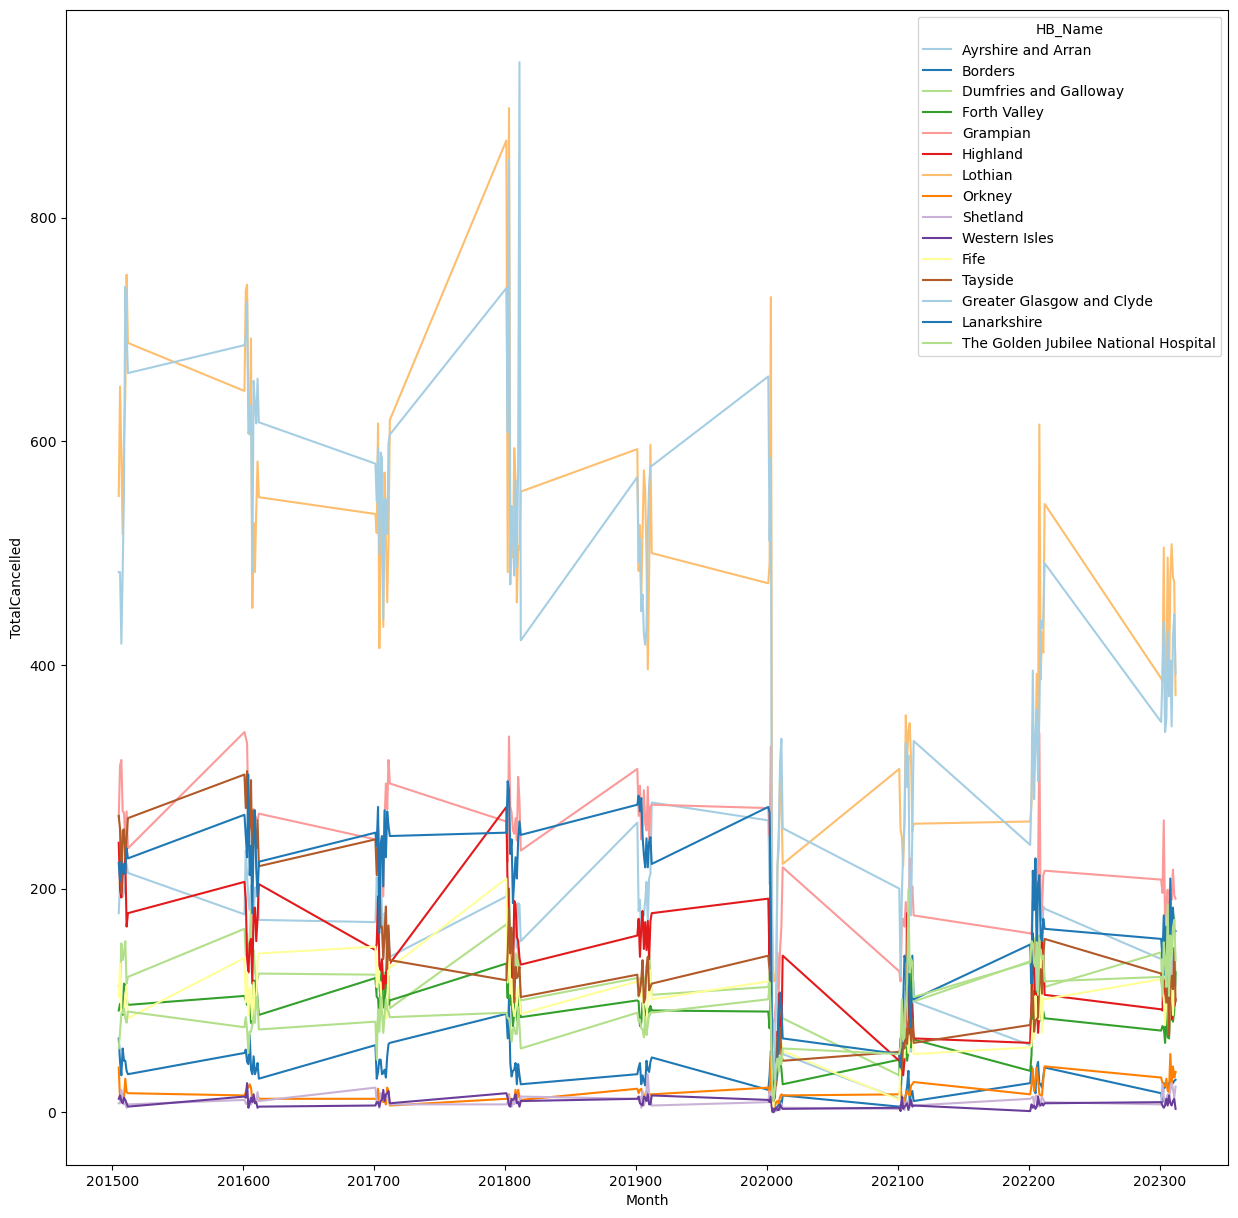

In [129]:
plt.subplots(figsize = (15,15))
sns.lineplot(palette="Paired",data = cancellations_hb[(cancellations_hb["Month"] < 202400)], x = "Month", y = "TotalCancelled", hue = "HB_Name")
# seems like the plot is too janky so lets smooth it out
# it also looks like there is a spike during or around winter something special?